# Applied DS Lab 1

## Task 1

Write a python program to parse the CSV files. Read the data from the CSV files into an appropriate python data structure. For the file handling part of this task you should NOT use an existing CSV reading and parsing library such as PANDAS. Instead you should code the capability from scratch. You are recommended to structure your code to allow re-use of the core parser as you may find it useful in the future. You may use libraries including PANDAS once you have read the data, including to convert datatypes from their raw input type.
Your code should correctly parse the CSV file provided. If a file is read that does not conform to the variant of the CSV file provided your program should not generate any unhandled exceptions.
Compute the minimum, maximum, mean and standard deviation for each component of the weather data and report this. In task 2 you may wish to account for gaps or other issues in the data provided, but in task 1 you should compute these values for all the data provided.
Using either a suitable python library to plot pairs of the data or Microsoft Excel, visually check for correlations between the weather components.

In [2]:
import numpy as np
# importing only numpy for the read csv task

In [17]:
# Custom funtion that takes filename as input, reads the contents and parses it to be returned and further processed

def my_csv_reader(filename):

    try:
        with open(filename, 'r', encoding='utf-8-sig') as f:
            if filename[-3:]!='csv':
                raise 
            data_parsed = []
            for line in f:
                elements = line.replace('"','').strip().split(',')
                data_parsed.append(elements)
        return data_parsed
    except:
        print('The file is not a csv or is corrupted')
        return


    

In [4]:
#Calling the custom csv reader function on the four data files given to us

barometer_data = np.array(my_csv_reader('barometer-last-year.csv'))
indoor_temp = np.array(my_csv_reader('indoor-temperature-last-year.csv'))
outdoor_temp = np.array(my_csv_reader('outside-temperature-last-year.csv'))
rainfall_data = np.array(my_csv_reader('rainfall-last-year.csv'))

In [28]:
# Only here am I importing pandas and the remaining dependencies required for the rest of the Tasks

import pandas as pd
from functools import reduce
import seaborn as sns
import matplotlib as plt

In [6]:
# Creating dataframes of the four csv files that have been read and parsed. We store them in four separate data frames for the time being

# the first entry in each parsed list contains the name, and the remaining contain the data. So the data has been read accordingly
df_barometer = pd.DataFrame(data=barometer_data[1:,:], columns=barometer_data[0,:]) 
df_indoor = pd.DataFrame(data=indoor_temp[1:,:], columns=indoor_temp[0,:])
df_outdoor = pd.DataFrame(data=outdoor_temp[1:,:], columns=outdoor_temp[0,:])
df_rainfall = pd.DataFrame(data=rainfall_data[1:,:], columns=rainfall_data[0,:])

In [7]:
# A sample of how one data frame looks like

df_indoor.head(5)

,DateTime,Humidity,Temperature,Temperature_range (low),Temperature_range (high)
0,2016-10-09 00:00:00,54,21.93,21,22.8
1,2016-10-10 00:00:00,52,21.77,20.4,23.6
2,2016-10-11 00:00:00,51,21.36,19.9,23
3,2016-10-12 00:00:00,51,21.44,20,23.6
4,2016-10-13 00:00:00,52,21.22,20.1,22.3


In [8]:
# Here, we merge all four data frames, on the DateTime column. We also rename the various termperature column names to something that makes more sense!

to_merge = [df_barometer, df_indoor, df_outdoor, df_rainfall]
df_merged = reduce(lambda  l,r: pd.merge(l,r,on=['DateTime'],
                                            how='outer'), to_merge)

df_merged.rename(columns = {'Temperature_x':'Temperature indoor', 
                            'Temperature_range (low)_x':'Temperature_range (low) indoor',
                            'Temperature_range (high)_x':'Temperature_range (high) indoor',
                            'Temperature_y':'Temperature outdoor', 
                            'Temperature_range (low)_y':'Temperature_range (low) outdoor',
                            'Temperature_range (high)_y':'Temperature_range (high) outdoor'}, inplace=True)

In [9]:
# Previewing the merged dataframe. This becomes our main dataframe for the rest of this notebook

df_merged.head()

,DateTime,Baro,Humidity,Temperature indoor,Temperature_range (low) indoor,Temperature_range (high) indoor,Temperature outdoor,Temperature_range (low) outdoor,Temperature_range (high) outdoor,mm
0,2016-10-09 00:00:00,1021.9,54,21.93,21,22.8,10.66,7.2,13.8,0
1,2016-10-10 00:00:00,1019.9,52,21.77,20.4,23.6,8.94,5.6,12.8,0
2,2016-10-11 00:00:00,1015.8,51,21.36,19.9,23,8.69,5.3,14.3,0
3,2016-10-12 00:00:00,1013.2,51,21.44,20,23.6,11.55,9,14.9,0
4,2016-10-13 00:00:00,1005.9,52,21.22,20.1,22.3,9.4,6,13.3,0


## Helper functions

These functions are used to preprocess and clean up our main Data Frame, by converting data to appropriate data types, as well as getting the respective statistical summaries for each column

In [24]:

# Converting DateTime column data to a datetime object
def convert_date(df):
    df['DateTime'] = pd.to_datetime(df['DateTime'], format="%Y/%m/%d %H:%M:%S")
    return df

# Converting all columns with numnerical data to float type
def convert_float(df):
    for col in df.columns[1:]:
        df[col] = pd.to_numeric(df[col], downcast='float')
    return df

# This function calculates the max, mean, min and standard deviation for each column, and stores it in a dictionary
def get_stats(df):
    results = dict()
    for col in df.columns[1:]:
        t = dict()
        t['Maximum'] = round(np.max(df[col]),2)
        t['Minimum'] = round(np.min(df[col]),2)
        t['Mean'] = round(np.mean(df[col]),2)
        t['Standard Deviation'] = round(np.std(df[col]),2)
        results[col] = t
    return results



In [19]:
# Viewing the cleaned dataframe

df_merged = convert_date(df_merged)
df_clean = convert_float(df_merged)
df_clean.head(5)

,DateTime,Baro,Humidity,Temperature indoor,Temperature_range (low) indoor,Temperature_range (high) indoor,Temperature outdoor,Temperature_range (low) outdoor,Temperature_range (high) outdoor,mm
0,2016-10-09,1021.900024,54.0,21.930000,21.0,22.799999,10.66,7.2,13.8,0.0
1,2016-10-10,1019.900024,52.0,21.770000,20.4,23.600000,8.94,5.6,12.8,0.0
2,2016-10-11,1015.799988,51.0,21.360001,19.9,23.000000,8.69,5.3,14.3,0.0
3,2016-10-12,1013.200012,51.0,21.440001,20.0,23.600000,11.55,9.0,14.9,0.0
4,2016-10-13,1005.900024,52.0,21.219999,20.1,22.299999,9.40,6.0,13.3,0.0


In [26]:
# As part of task 1, this is where we print out the required values for each weather component

stats = get_stats(df_clean)
print("    COMPONENT-WISE STATISTICS: \n=========================================================")
for s in stats:
    print("{}: Mean = {} || Maximum = {} || Minimum = {} || Standard Deviation = {}".format(s,stats[s]['Mean'],stats[s]['Maximum'],stats[s]['Minimum'],
                                                                                                                        stats[s]['Standard Deviation']))
    print("------")

    COMPONENT-WISE STATISTICS: 
Baro: Mean = 1010.0 || Maximum = 1035.6 || Minimum = 979.6 || Standard Deviation = 9.86
------
Humidity: Mean = 48.52 || Maximum = 59.0 || Minimum = 37.0 || Standard Deviation = 5.18
------
Temperature indoor: Mean = 21.83 || Maximum = 29.21 || Minimum = 18.04 || Standard Deviation = 2.06
------
Temperature_range (low) indoor: Mean = 20.56 || Maximum = 28.2 || Minimum = 14.9 || Standard Deviation = 2.4
------
Temperature_range (high) indoor: Mean = 23.53 || Maximum = 31.1 || Minimum = 19.7 || Standard Deviation = 1.7
------
Temperature outdoor: Mean = 11.14 || Maximum = 26.38 || Minimum = -1.81 || Standard Deviation = 5.35
------
Temperature_range (low) outdoor: Mean = 7.87 || Maximum = 18.7 || Minimum = -4.1 || Standard Deviation = 4.87
------
Temperature_range (high) outdoor: Mean = 15.52 || Maximum = 38.5 || Minimum = 1.5 || Standard Deviation = 7.02
------
mm: Mean = 1.55 || Maximum = 23.2 || Minimum = 0.0 || Standard Deviation = 3.32
------


## Visualizing the correlations between components

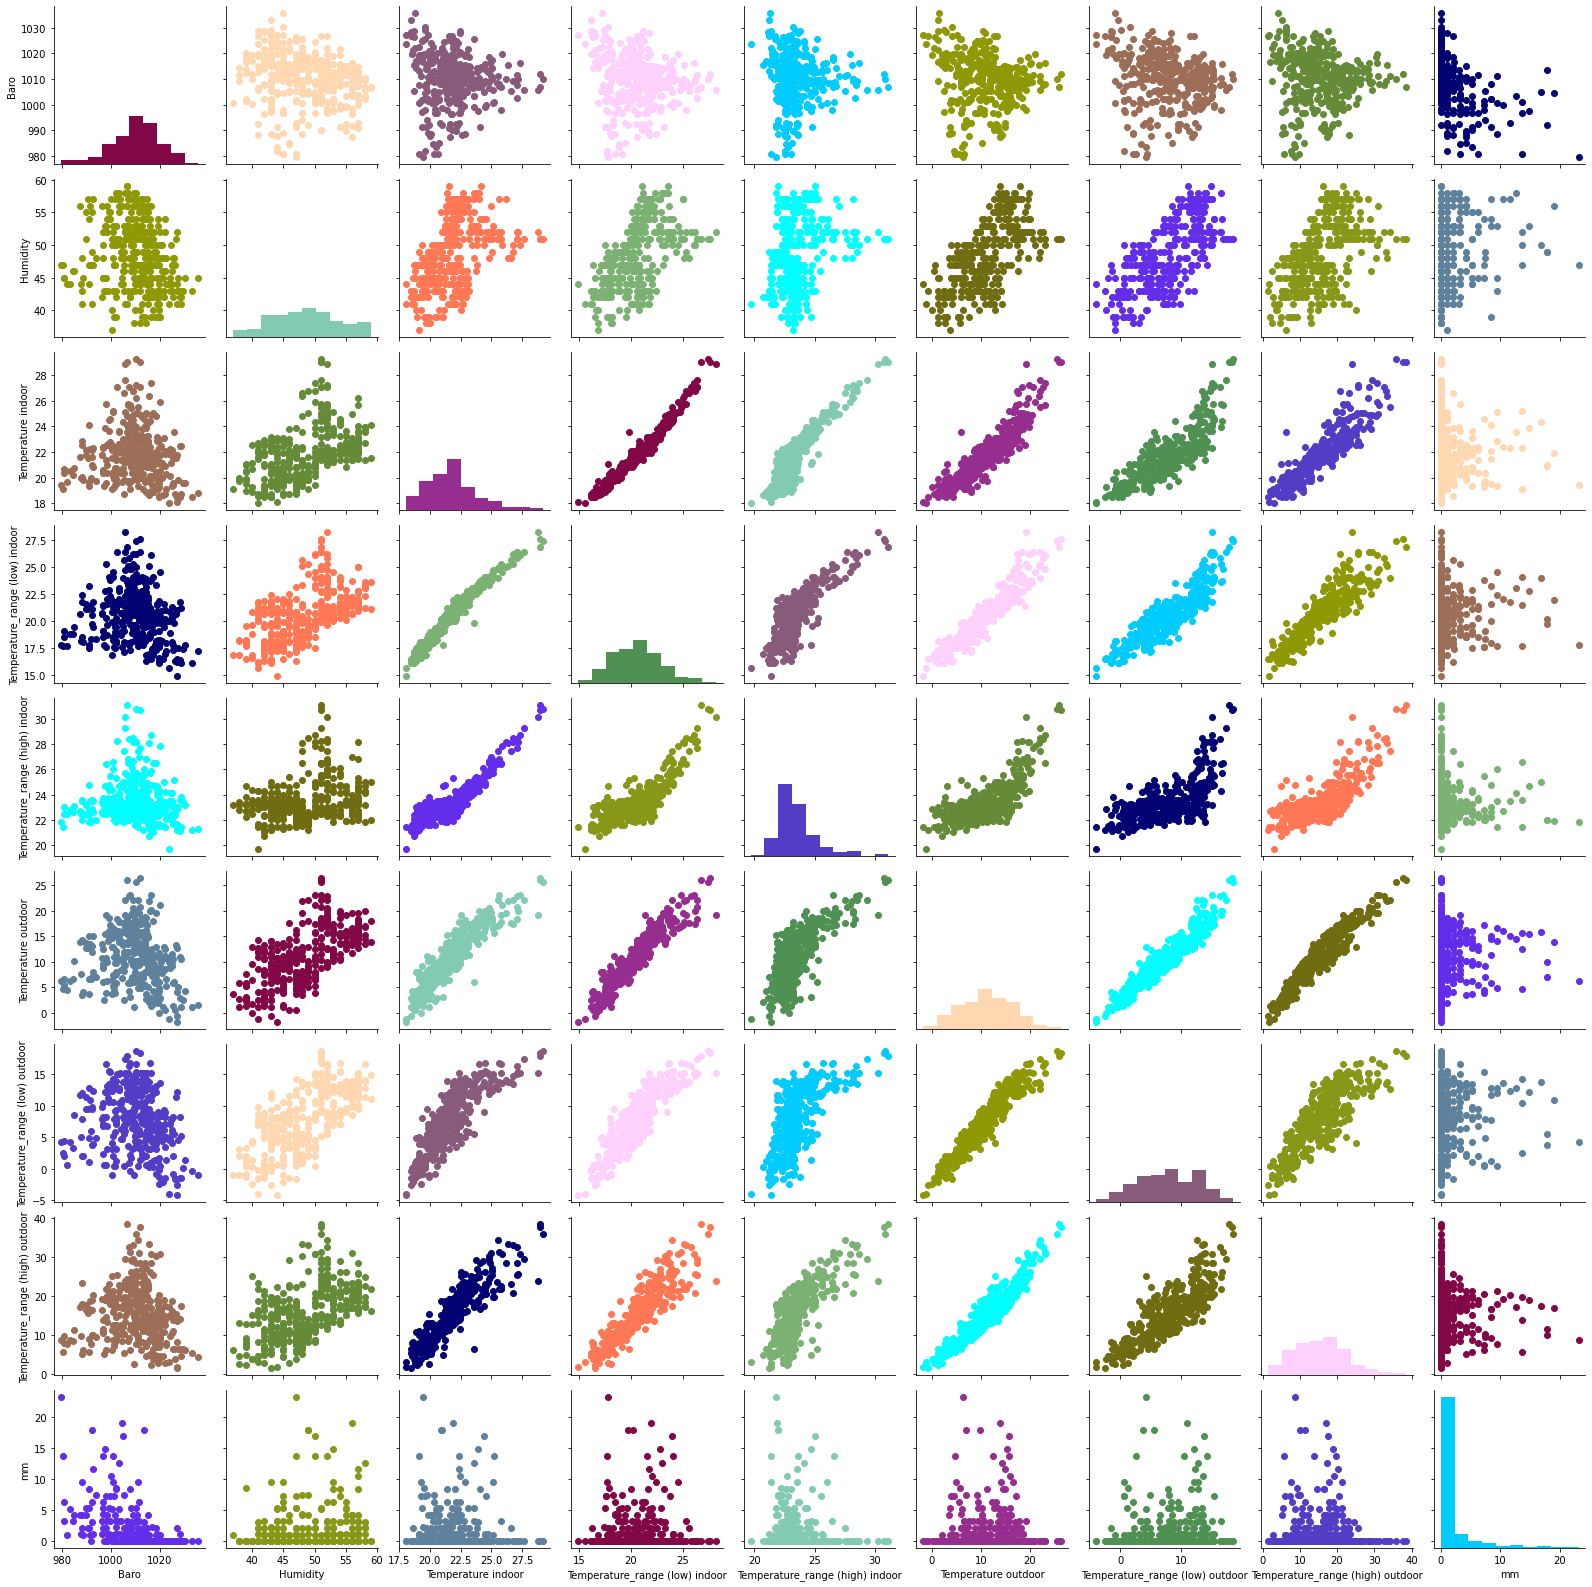

In [31]:
# Storing different colours in a list
colors = iter(['xkcd:red purple', 'xkcd:pale teal', 'xkcd:warm purple',
       'xkcd:light forest green', 'xkcd:blue with a hint of purple',
       'xkcd:light peach', 'xkcd:dusky purple', 'xkcd:pale mauve',
       'xkcd:bright sky blue', 'xkcd:baby poop green', 'xkcd:brownish',
       'xkcd:moss green', 'xkcd:deep blue', 'xkcd:melon',
       'xkcd:faded green', 'xkcd:cyan', 'xkcd:brown green',
       'xkcd:purple blue', 'xkcd:baby shit green', 'xkcd:greyish blue']*5) 

# Creating separate functions for scatter and histogram for our overall correlation plot
def my_scatter(x,y, **kwargs):
    kwargs['color'] = next(colors)
    plt.pyplot.scatter(x,y, **kwargs)

def my_hist(x, **kwargs):
    kwargs['color'] = next(colors)
    plt.pyplot.hist(x, **kwargs)

g = sns.PairGrid(df_clean)
g.map_diag(my_hist)
g.map_offdiag(my_scatter)




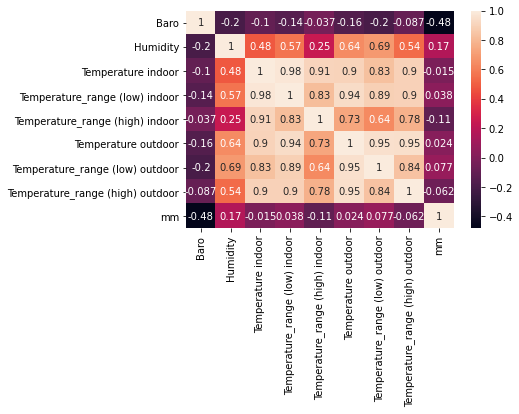

In [32]:
# Viewing the correlation as a heatmap as well
sns.heatmap(df_clean.corr(), annot=True)
plt.pyplot.show()

## Task 2

Extend your code to summarise the data into monthly and seasonable values. From this summary data construct two separate infographics. One using the monthly values and one using the seasonal values. These should convey the
            
summarised data for all the weather components concisely and clearly. Provide a brief report (one page) than justifies the visual mappings you’ve used.

In [33]:
# Creating monthly dataframe by first creating a new column, storing the month for each entry, and then grouping them according to the month

df_clean['month'] = pd.DatetimeIndex(df_clean['DateTime']).month
df_month = df_clean.groupby('month')
# df_1.aggregate({'Baro': np.mean})
df_month.describe()

Baro                                                                 \
      count         mean        std          min          25%          50%   
month                                                                        
1      31.0  1015.422485   9.825940   998.099976  1005.350006  1018.299988   
2      28.0  1005.757141  12.848620   980.900024   996.875015  1009.250000   
3      30.0  1006.503357  11.363358   980.799988  1000.649979  1008.750000   
4      30.0  1015.373230   7.881660   992.400024  1011.699982  1015.350006   
5      31.0  1008.864624   7.792111   988.200012  1005.399994  1010.099976   
6      30.0  1006.083374   7.415181   989.900024  1003.675003  1007.000000   
7      31.0  1006.745178   6.168781   997.700012  1000.350006  1008.000000   
8      22.0  1009.113525   3.384741  1001.900024  1007.050003  1009.750000   
9      30.0  1005.846741   7.962401   987.400024  1003.424988  1007.450012   
10     32.0  1013.328003   7.649852   998.000000  1008.999985  1013.950012   
11     30.0  1007.393433  13.117874   979.599976  1000.924988  1009.250000   
12     30.0  1018.779907   6.589135  1009.200012  1015.450012  1017.050018   

                                Humidity             ...  \
               75%          max    count       mean  ...   
month                                                ...   
1      1023.199982  1030.199951     31.0  42.483871  ...   
2      1016.524994  1021.700012     28.0  43.178570  ...   
3      1014.050003  1025.300049     30.0  46.266666  ...   
4      1020.274994  1028.599976     30.0  43.700001  ...   
5      1014.450012  1019.700012     31.0  45.096775  ...   
6      1009.925003  1019.900024     30.0  51.533333  ...   
7      1012.300018  1016.200012     30.0  53.033333  ...   
8      1010.524979  1015.200012     22.0  57.000000  ...   
9      1011.924988  1015.200012     30.0  55.166668  ...   
10     1019.124985  1026.900024     32.0  52.718750  ...   
11     1017.850006  1027.099976     30.0  48.133335  ...   
12     1021.774994  1035.599976     30.0  45.866665  ...   

      Temperature_range (high) outdoor               mm                      \
                                   75%        max count      mean       std   
month                                                                         
1                             8.950000  11.400000  31.0  1.158064  2.531768   
2                            11.125000  13.000000  28.0  1.164286  1.755249   
3                            15.400000  19.100000  30.0  1.020000  1.739282   
4                            17.075000  22.400000  30.0  0.243333  0.705976   
5                            23.050000  33.299999  30.0  1.406667  3.556726   
6                            25.350000  38.500000  30.0  1.506667  3.085890   
7                            27.800000  34.299999  31.0  3.093549  5.173261   
8                            23.575000  31.000000  22.0  1.722727  2.907123   
9                            19.724999  23.799999  30.0  2.386666  2.772492   
10                           15.500000  21.700001  32.0  0.925000  2.014783   
11                           10.925000  14.100000  30.0  3.020000  5.784188   
12                           10.900000  13.200000  29.0  0.941379  3.368819   

                                        
       min  25%  50%    75%        max  
month                                   
1      0.0  0.0  0.0  1.050   9.500000  
2      0.0  0.0  0.0  1.350   6.300000  
3      0.0  0.0  0.0  1.100   6.300000  
4      0.0  0.0  0.0  0.000   3.100000  
5      0.0  0.0  0.0  1.000  16.900000  
6      0.0  0.0  0.0  1.100  13.700000  
7      0.0  0.0  0.0  3.700  19.000000  
8      0.0  0.0  0.0  2.850  12.600000  
9      0.0  1.0  1.1  3.175  11.600000  
10     0.0  0.0  0.0  1.100   8.400000  
11     0.0  0.0  0.0  3.950  23.200001  
12     0.0  0.0  0.0  0.000  17.900000  

[12 rows x 72 columns]

In [53]:
# Viewing the month dataframe
df_month.head(10)

,DateTime,Baro,Humidity,Temperature indoor,Temperature_range (low) indoor,Temperature_range (high) indoor,Temperature outdoor,Temperature_range (low) outdoor,Temperature_range (high) outdoor,mm,month,season
0,2016-10-09,1021.900024,54.0,21.930000,21.000000,22.799999,10.66,7.2,13.800000,0.0,10,Fall16
1,2016-10-10,1019.900024,52.0,21.770000,20.400000,23.600000,8.94,5.6,12.800000,0.0,10,Fall16
2,2016-10-11,1015.799988,51.0,21.360001,19.900000,23.000000,8.69,5.3,14.300000,0.0,10,Fall16
3,2016-10-12,1013.200012,51.0,21.440001,20.000000,23.600000,11.55,9.0,14.900000,0.0,10,Fall16
4,2016-10-13,1005.900024,52.0,21.219999,20.100000,22.299999,9.40,6.0,13.300000,0.0,10,Fall16
...,...,...,...,...,...,...,...,...,...,...,...,...
321,2017-09-06,1012.099976,57.0,22.650000,21.900000,23.799999,15.78,12.7,21.200001,0.0,9,Fall17
322,2017-09-07,1006.500000,56.0,22.350000,22.100000,22.700001,15.39,13.0,19.100000,3.2,9,Fall17
323,2017-09-08,992.799988,57.0,22.340000,21.700001,23.500000,14.97,12.4,20.200001,11.6,9,Fall17
324,2017-09-09,991.599976,56.0,22.240000,21.400000,23.500000,13.55,10.9,18.600000,1.0,9,Fall17


The next few cells contain various components of the monthly data, which will be used for the infographic. Feel free to skip below to the seasonal code

In [127]:
df_month[['Humidity']].mean()

,Humidity
month,
1,42.483871
2,43.178570
3,46.266666
4,43.700001
5,45.096775
6,51.533333
7,53.033333
8,57.000000
9,55.166668


In [128]:
df_month[['Humidity']].max()

,Humidity
month,
1,47.0
2,47.0
3,52.0
4,47.0
5,51.0
6,55.0
7,57.0
8,59.0
9,58.0


In [129]:
df_month[['Humidity']].min()

,Humidity
month,
1,37.0
2,38.0
3,43.0
4,39.0
5,40.0
6,50.0
7,51.0
8,56.0
9,52.0


In [102]:
df_month[['mm']].mean().round(decimals=3)

,mm
month,
1,1.158
2,1.164
3,1.020
4,0.243
5,1.407
6,1.507
7,3.094
8,1.723
9,2.387


In [103]:
df_month[['mm']].max().round(decimals=3)

,mm
month,
1,9.500000
2,6.300000
3,6.300000
4,3.100000
5,16.900000
6,13.700000
7,19.000000
8,12.600000
9,11.600000


In [104]:
df_month[['mm']].min().round(decimals=3)

,mm
month,
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [101]:
df_month[['Baro']].mean().round(decimals=3)

,Baro
month,
1,1015.422974
2,1005.757019
3,1006.502991
4,1015.372986
5,1008.864014
6,1006.083008
7,1006.744995
8,1009.114014
9,1005.846985


In [59]:
df_month['Temperature_range (high) outdoor'].max() - df_month['Temperature_range (low) outdoor'].min()

month
1     13.900000
2     13.300000
3     17.400000
4     20.900000
5     29.099998
6     29.400000
7     23.699999
8     21.000000
9     16.799999
10    18.000000
11    18.200001
12    17.200001
dtype: float32

In [88]:
df_month['Temperature_range (low) indoor'].min()

month
1     16.200001
2     16.500000
3     17.799999
4     18.799999
5     20.600000
6     20.700001
7     21.400000
8     21.700001
9     20.299999
10    19.000000
11    14.900000
12    15.600000
Name: Temperature_range (low) indoor, dtype: float32

In [89]:
df_month['Temperature_range (high) indoor'].max()

month
1     24.700001
2     24.299999
3     25.299999
4     25.000000
5     28.500000
6     31.100000
7     29.299999
8     28.200001
9     24.700001
10    23.600000
11    23.100000
12    25.200001
Name: Temperature_range (high) indoor, dtype: float32

In [34]:
# Function to categorize each data point to a certain season based on the month it belongs to

def month_to_season(month):
    spring = list(range(3, 5+1))
    summer = list(range(6, 8+1))
    fall = list(range(9, 11+1))
    winter = [12, 1, 2]
    if month in spring:
        return 'Spring'
    elif month in summer:
        return 'Summer'
    elif month in fall:
        return 'Fall'
    else:
        return 'Winter'

In [43]:
# Creating a season column and the using that column to group the data and creat a seasons data frame.

df_clean['season'] = df_clean['month'].apply(month_to_season)
df_clean['season'] = df_clean.apply(lambda x: x['season']+str(pd.Timestamp(x['DateTime']).year)[-2:] if x['season']=='Fall' else x['season'],axis=1)
df_season = df_clean.groupby('season')

df_season.describe()

Baro                                                                \
       count         mean        std         min          25%          50%   
season                                                                       
Fall16  53.0  1010.190613  11.696358  979.599976  1002.200012  1013.200012   
Fall17  39.0  1007.271851   7.801383  987.400024  1004.500000  1009.900024   
Spring  91.0  1010.231873   9.795529  980.799988  1005.399994  1011.799988   
Summer  83.0  1007.133728   6.149345  989.900024  1003.450012  1008.400024   
Winter  89.0  1013.513489  11.302895  980.900024  1009.099976  1016.500000   

                                 Humidity             ...    mm             \
                75%          max    count       mean  ...   75%        max   
season                                                ...                    
Fall16  1018.400024  1027.099976     53.0  49.603775  ...  2.10  23.200001   
Fall17  1012.649994  1019.200012     39.0  55.307693  ...  2.65  11.600000   
Spring  1015.649994  1028.599976     91.0  45.021976  ...  1.00  16.900000   
Summer  1010.849976  1019.900024     82.0  53.548782  ...  3.10  19.000000   
Winter  1019.799988  1035.599976     89.0  43.842697  ...  1.00  17.900000   

       month                                                     
       count       mean       std   min   25%   50%   75%   max  
season                                                           
Fall16  53.0  10.566038  0.500363  10.0  10.0  11.0  11.0  11.0  
Fall17  39.0   9.230769  0.426833   9.0   9.0   9.0   9.0  10.0  
Spring  91.0   4.010989  0.823198   3.0   3.0   4.0   5.0   5.0  
Summer  83.0   6.903614  0.790407   6.0   6.0   7.0   8.0   8.0  
Winter  89.0   5.022472  5.020362   1.0   1.0   2.0  12.0  12.0  

[5 rows x 80 columns]

he next few cells contain various components of the seasonal data, which will be used for the infographic. Feel free to skip 

In [124]:
df_season[['Humidity']].mean()

,Humidity
season,
Fall16,49.603775
Fall17,55.307693
Spring,45.021976
Summer,53.548782
Winter,43.842697


In [125]:
df_season[['Humidity']].max()

,Humidity
season,
Fall16,54.0
Fall17,59.0
Spring,52.0
Summer,59.0
Winter,50.0


In [126]:
df_season[['Humidity']].min()

,Humidity
season,
Fall16,44.0
Fall17,52.0
Spring,39.0
Summer,50.0
Winter,37.0


In [122]:
df_season[['Baro']].mean().round(decimals=3)

,Baro
season,
Fall16,1010.190979
Fall17,1007.271973
Spring,1010.231995
Summer,1007.133972
Winter,1013.513977


In [113]:
df_season['Temperature_range (low) outdoor'].min()

season
Fall16   -4.1
Fall17    7.0
Spring    1.5
Summer    9.1
Winter   -4.0
Name: Temperature_range (low) outdoor, dtype: float32

In [114]:
df_season['Temperature_range (high) outdoor'].max()

season
Fall16    16.400000
Fall17    23.799999
Spring    33.299999
Summer    38.500000
Winter    13.200000
Name: Temperature_range (high) outdoor, dtype: float32

In [123]:
df_season[['mm']].mean().round(decimals=3)

,mm
season,
Fall16,2.187
Fall17,1.946
Spring,0.890
Summer,2.157
Winter,1.089
